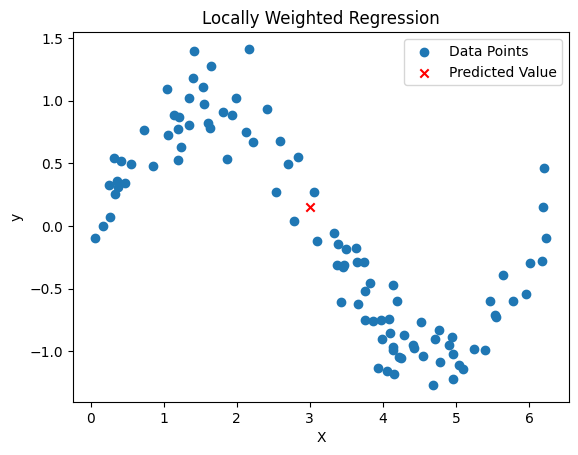

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def locally_weighted_regression(X, y, query_point, tau=0.1):
    # Indent the code block within the function
    m = X.shape[0]
    X_ = np.c_[np.ones((m, 1)), X]
    weights = np.exp(-(np.sum((X - query_point) ** 2, axis=1) / (2 * tau ** 2)))
    W = np.diag(weights)
    theta = np.linalg.inv(X_.T @ W @ X_) @ (X_.T @ W @ y)
    query_point_ = np.array([1, query_point])
    y_pred = query_point_.dot(theta)
    return y_pred

X = 2 * np.pi * np.random.rand(100, 1)
y = np.sin(X) + 0.2 * np.random.randn(100, 1)
sorted_indices = X[:, 0].argsort()
X = X[sorted_indices]
y = y[sorted_indices]
query_point = 3.0
tau = 0.3
y_pred = locally_weighted_regression(X, y, query_point, tau)
plt.scatter(X, y, label='Data Points')
plt.scatter(query_point, y_pred, color='red', marker='x', label='Predicted Value')
plt.title('Locally Weighted Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()